In [1]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D

In [2]:
from keras.preprocessing import image
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image
from matplotlib.pyplot import imread, imshow

In [3]:
from keras import backend as K
K.set_image_data_format('channels_first')
from keras.models import model_from_json
from keras.applications.vgg16 import preprocess_input

# Loading the model
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_final.h5")




Metal device set to: Apple M1


In [4]:
# Loading model weights from a file
loaded_model.load_weights("model_final.h5")

# Loading a test image
img_path = '/Users/alyona_dushkina/1.jpg'
img = Image.open(img_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize image to 28x28

In [5]:
# Converting an image to a numpy array
x = np.array(img)
x = x.reshape(1, 1, 28, 28)  # Reshaping an Array to Fit Model Input


In [6]:
# Making a prediction using a loaded model
predictions = loaded_model.predict(x)

1/1 [==============================] - 0s 116ms/step


2024-02-19 18:33:47.387941: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [7]:
# Determination of the class with the highest probability
predicted_class_index = np.argmax(predictions)

In [8]:
# Definition of a classified result
if predicted_class_index == 10:
    print('-')
elif predicted_class_index == 11:
    print('+')
elif predicted_class_index == 12:
    print('/')
elif predicted_class_index == 13:
    print('=')
else:
    print(predicted_class_index)  # Class index output

1


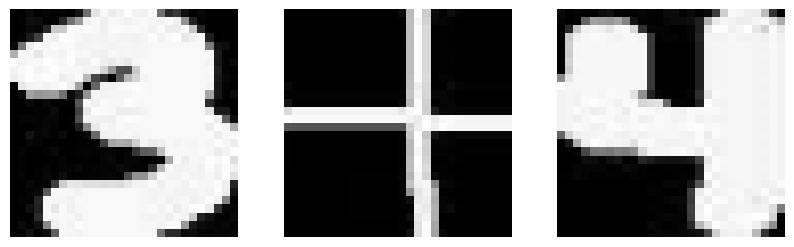

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/Users/alyona_dushkina/Desktop/3+4_.jpg', cv2.IMREAD_GRAYSCALE)

if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
    img = ~img
    ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w, h = int(28), int(28)
    train_data = []

    rects = []
    for c in cnt:
        x, y, w, h = cv2.boundingRect(c)
        rect = [x, y, w, h]
        rects.append(rect)

    bool_rect = []
    for r in rects:
        l = []
        for rec in rects:
            flag = 0
            if rec != r:
                if r[0] < (rec[0] + rec[2] + 10) and rec[0] < (r[0] + r[2] + 10) and r[1] < (rec[1] + rec[3] + 10) and rec[1] < (r[1] + r[3] + 10):
                    flag = 1
                l.append(flag)
            if rec == r:
                l.append(0)
        bool_rect.append(l)

    dump_rect = []
    for i in range(0, len(cnt)):
        for j in range(0, len(cnt)):
            if bool_rect[i][j] == 1:
                area1 = rects[i][2] * rects[i][3]
                area2 = rects[j][2] * rects[j][3]
                if(area1 == min(area1, area2)):
                    dump_rect.append(rects[i])

    final_rect = [i for i in rects if i not in dump_rect]

    for r in final_rect:
        x, y, w, h = r[0], r[1], r[2], r[3]
        roi = img[y:y+h, x:x+w]
        resized_roi = cv2.resize(roi, (28, 28))
        train_data.append(resized_roi)

    # Displaying images from train_data
    plt.figure(figsize=(10, 10))
    for i in range(len(train_data)):
        plt.subplot(1, len(train_data), i+1)
        plt.imshow(train_data[i], cmap='gray')
        plt.axis('off')
    plt.show()


In [10]:
s = ''
for roi in train_data:
    roi = np.expand_dims(roi, axis=0)  
    roi = np.expand_dims(roi, axis=0)  
    result = loaded_model.predict(roi)
    predicted_class_index = np.argmax(result)
    
    if predicted_class_index == 10:
        s += '-'
    elif predicted_class_index == 11:
        s += '+'
    elif predicted_class_index == 12:
        s += '/'
    elif predicted_class_index == 13:
        s += '='
    else:
        s += str(predicted_class_index)

print(s)


1/1 [==============================] - 0s 14ms/step
3+4


In [11]:
eval(s)

7